# keras SVM for cifa10 test
a SVM network networkk for CIFA10 classfier test, correspoding to CS231n assignment1 SVM.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from cifar10_demo.data_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Training data shape: (50000, 32, 32, 3)
Training label shape (50000, 1)
Test data shape (10000, 32, 32, 3)
Test label shape (10000, 1)


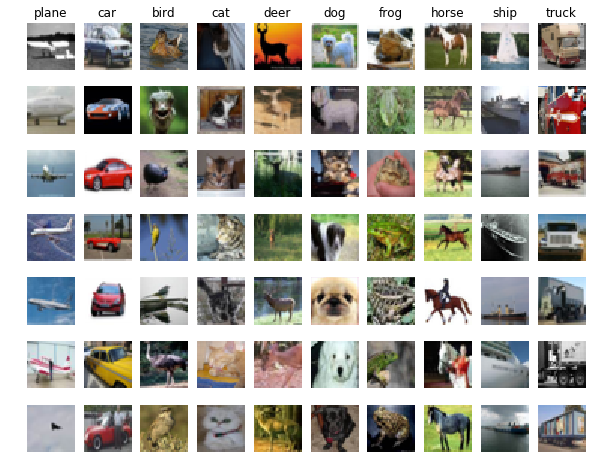

In [2]:
cifar10_data = CIFAR10Data()
plot_cifar10(cifar10_data, 7)

In [3]:
# get stretch data
x_train, y_train, x_test, y_test = cifar10_data.get_stretch_data(subtract_mean=True)
# Subsample data for more efficient code execution
num_training = 5000

mask = list(range(num_training))
x_small_train = x_train[mask]
y_small_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
x_small_test = x_train[mask]
y_small_test = y_test[mask]


# SVM
test a simple full connected svm classifier

In [8]:
# training 

svm_model = Sequential()
num_classes = 10
N, D = x_train.shape
svm_model.add(Dense(num_classes, 
                    input_shape=(D,),
                    kernel_regularizer=keras.regularizers.l2(9e3),
                    # kernel_regularizer=None,
                    kernel_initializer=keras.initializers.random_normal(stddev=1e-3),
                    use_bias=False,
                    ))

svm_model.compile(optimizer=keras.optimizers.SGD(lr=1.6e-7),
                  loss=keras.losses.categorical_hinge,
                  metrics=['accuracy'],
                  )
svm_model.summary()

# TODO: svm loss not num_classes-1 when weight is set small
# loss, acc = svm_model.train_on_batch(x_small_train, y_small_train)
# print(loss, acc)
# class LossHistory(keras.callbacks.Callback):
# 
# 
#     def on_epoch_begin(self, batch, logs={}):
#         lr = K.get_value(self.model.optimizer.lr)
#         print('Ir:', lr)
# 

history = svm_model.fit(x_train, y_train,
                        epochs=6, batch_size=200,
                        validation_split=0.02, shuffle=False,
                        )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                30720     
Total params: 30,720
Trainable params: 30,720
Non-trainable params: 0
_________________________________________________________________
Train on 49000 samples, validate on 1000 samples
Epoch 1/6


  200/49000 [..............................] - ETA: 23s - loss: 283.7655 - acc: 0.0500

 2200/49000 [>.............................] - ETA: 3s - loss: 275.4310 - acc: 0.0882 

 4600/49000 [=>............................] - ETA: 1s - loss: 266.0283 - acc: 0.0896

 7000/49000 [===>..........................] - ETA: 1s - loss: 257.0098 - acc: 0.0934

 9600/49000 [====>.........................] - ETA: 1s - loss: 247.7615 - acc: 0.0965

12200/49000 [======>.......................] - ETA: 1s - loss: 238.9796 - acc: 0.0986

14800/49000 [========>.....................] - ETA: 0s - loss: 230.6486 - acc: 0.1018

17400/49000 [=========>....................] - ETA: 0s - loss: 222.7367 - acc: 0.1057

19800/49000 [===========>..................] - ETA: 0s - loss: 215.7577 - acc: 0.1093

22400/49000 [============>.................] - ETA: 0s - loss: 208.5393 - acc: 0.1142

24800/49000 [==============>...............] - ETA: 0s - loss: 202.1817 - acc: 0.1187

27000/49000 [===============>..............] - ETA: 0s - loss: 196.6027 - acc: 0.1226

29200/49000 [================>.............] - ETA: 0s - loss: 191.2446 - acc: 0.1256

31800/49000 [==================>...........] - ETA: 0s - loss: 185.1806 - acc: 0.1299

34600/49000 [====================>.........] - ETA: 0s - loss: 178.9641 - acc: 0.1337

37400/49000 [=====================>........] - ETA: 0s - loss: 173.0478 - acc: 0.1376

40200/49000 [=======================>......] - ETA: 0s - loss: 167.4202 - acc: 0.1412

42400/49000 [========================>.....] - ETA: 0s - loss: 163.1867 - acc: 0.1435

44800/49000 [==========================>...] - ETA: 0s - loss: 158.7492 - acc: 0.1461

47000/49000 [===========================>..] - ETA: 0s - loss: 154.8391 - acc: 0.1485

49000/49000 [==============================] - 1s 24us/step - loss: 151.4110 - acc: 0.1504 - val_loss: 68.6663 - val_acc: 0.2050


Epoch 2/6


  200/49000 [..............................] - ETA: 2s - loss: 68.6891 - acc: 0.1800

 2800/49000 [>.............................] - ETA: 1s - loss: 66.1724 - acc: 0.1996

 4600/49000 [=>............................] - ETA: 1s - loss: 64.5262 - acc: 0.2059

 6200/49000 [==>...........................] - ETA: 1s - loss: 63.1030 - acc: 0.2085

 8200/49000 [====>.........................] - ETA: 1s - loss: 61.3813 - acc: 0.2123

10600/49000 [=====>........................] - ETA: 0s - loss: 59.4126 - acc: 0.2115

12800/49000 [======>.......................] - ETA: 0s - loss: 57.6752 - acc: 0.2149

15400/49000 [========>.....................] - ETA: 0s - loss: 55.7248 - acc: 0.2125

17800/49000 [=========>....................] - ETA: 0s - loss: 54.0063 - acc: 0.2120

20400/49000 [===========>..................] - ETA: 0s - loss: 52.2203 - acc: 0.2133

23200/49000 [=============>................] - ETA: 0s - loss: 50.3895 - acc: 0.2164

26200/49000 [===============>..............] - ETA: 0s - loss: 48.5276 - acc: 0.2193

28800/49000 [================>.............] - ETA: 0s - loss: 46.9968 - acc: 0.2212

31600/49000 [==================>...........] - ETA: 0s - loss: 45.4259 - acc: 0.2231

34000/49000 [===================>..........] - ETA: 0s - loss: 44.1402 - acc: 0.2239

36200/49000 [=====================>........] - ETA: 0s - loss: 43.0079 - acc: 0.2258

38800/49000 [======================>.......] - ETA: 0s - loss: 41.7264 - acc: 0.2274

41600/49000 [========================>.....] - ETA: 0s - loss: 40.4101 - acc: 0.2286

44400/49000 [==========================>...] - ETA: 0s - loss: 39.1536 - acc: 0.2307

47200/49000 [===========================>..] - ETA: 0s - loss: 37.9569 - acc: 0.2324

49000/49000 [==============================] - 1s 21us/step - loss: 37.2176 - acc: 0.2333 - val_loss: 17.3479 - val_acc: 0.2740


Epoch 3/6
  200/49000 [..............................] - ETA: 1s - loss: 17.3488 - acc: 0.2700

 2600/49000 [>.............................] - ETA: 0s - loss: 16.7923 - acc: 0.2623

 5400/49000 [==>...........................] - ETA: 0s - loss: 16.1794 - acc: 0.2659

 8200/49000 [====>.........................] - ETA: 0s - loss: 15.5891 - acc: 0.2710

11000/49000 [=====>........................] - ETA: 0s - loss: 15.0385 - acc: 0.2712

13800/49000 [=======>......................] - ETA: 0s - loss: 14.5125 - acc: 0.2712

16400/49000 [=========>....................] - ETA: 0s - loss: 14.0520 - acc: 0.2690

19200/49000 [==========>...................] - ETA: 0s - loss: 13.5768 - acc: 0.2687

22000/49000 [============>.................] - ETA: 0s - loss: 13.1245 - acc: 0.2716

24800/49000 [==============>...............] - ETA: 0s - loss: 12.6929 - acc: 0.2742

27600/49000 [===============>..............] - ETA: 0s - loss: 12.2845 - acc: 0.2762

30400/49000 [=================>............] - ETA: 0s - loss: 11.8974 - acc: 0.2771

33200/49000 [===================>..........] - ETA: 0s - loss: 11.5284 - acc: 0.2784

36000/49000 [=====================>........] - ETA: 0s - loss: 11.1772 - acc: 0.2798

38800/49000 [======================>.......] - ETA: 0s - loss: 10.8432 - acc: 0.2806

41600/49000 [========================>.....] - ETA: 0s - loss: 10.5254 - acc: 0.2817

44400/49000 [==========================>...] - ETA: 0s - loss: 10.2215 - acc: 0.2834

47200/49000 [===========================>..] - ETA: 0s - loss: 9.9324 - acc: 0.2839 

49000/49000 [==============================] - 1s 19us/step - loss: 9.7537 - acc: 0.2844 - val_loss: 4.9514 - val_acc: 0.3100


Epoch 4/6
  200/49000 [..............................] - ETA: 1s - loss: 4.9470 - acc: 0.3050

 2800/49000 [>.............................] - ETA: 0s - loss: 4.8060 - acc: 0.2996

 5600/49000 [==>...........................] - ETA: 0s - loss: 4.6594 - acc: 0.2993

 8400/49000 [====>.........................] - ETA: 0s - loss: 4.5160 - acc: 0.3081

11200/49000 [=====>........................] - ETA: 0s - loss: 4.3848 - acc: 0.3077

14000/49000 [=======>......................] - ETA: 0s - loss: 4.2582 - acc: 0.3074

16800/49000 [=========>....................] - ETA: 0s - loss: 4.1398 - acc: 0.3060

19600/49000 [===========>..................] - ETA: 0s - loss: 4.0258 - acc: 0.3059

22400/49000 [============>.................] - ETA: 0s - loss: 3.9167 - acc: 0.3077

25200/49000 [==============>...............] - ETA: 0s - loss: 3.8125 - acc: 0.3114

28000/49000 [================>.............] - ETA: 0s - loss: 3.7147 - acc: 0.3122

30800/49000 [=================>............] - ETA: 0s - loss: 3.6219 - acc: 0.3126

33600/49000 [===================>..........] - ETA: 0s - loss: 3.5333 - acc: 0.3134

36400/49000 [=====================>........] - ETA: 0s - loss: 3.4489 - acc: 0.3149

39200/49000 [=======================>......] - ETA: 0s - loss: 3.3689 - acc: 0.3149

42000/49000 [========================>.....] - ETA: 0s - loss: 3.2927 - acc: 0.3155

45000/49000 [==========================>...] - ETA: 0s - loss: 3.2148 - acc: 0.3156

47800/49000 [============================>.] - ETA: 0s - loss: 3.1457 - acc: 0.3164

49000/49000 [==============================] - 1s 19us/step - loss: 3.1171 - acc: 0.3170 - val_loss: 1.9571 - val_acc: 0.3440


Epoch 5/6
  200/49000 [..............................] - ETA: 1s - loss: 1.9543 - acc: 0.3750

 2600/49000 [>.............................] - ETA: 1s - loss: 1.9235 - acc: 0.3300

 5000/49000 [==>...........................] - ETA: 0s - loss: 1.8948 - acc: 0.3262

 7600/49000 [===>..........................] - ETA: 0s - loss: 1.8623 - acc: 0.3279

 9200/49000 [====>.........................] - ETA: 0s - loss: 1.8438 - acc: 0.3286

12000/49000 [======>.......................] - ETA: 0s - loss: 1.8129 - acc: 0.3269

14400/49000 [=======>......................] - ETA: 0s - loss: 1.7874 - acc: 0.3278

16400/49000 [=========>....................] - ETA: 0s - loss: 1.7673 - acc: 0.3267

19000/49000 [==========>...................] - ETA: 0s - loss: 1.7418 - acc: 0.3258

21600/49000 [============>.................] - ETA: 0s - loss: 1.7171 - acc: 0.3282

24200/49000 [=============>................] - ETA: 0s - loss: 1.6932 - acc: 0.3307

26800/49000 [===============>..............] - ETA: 0s - loss: 1.6705 - acc: 0.3331

29400/49000 [=================>............] - ETA: 0s - loss: 1.6497 - acc: 0.3321

32000/49000 [==================>...........] - ETA: 0s - loss: 1.6296 - acc: 0.3323

34800/49000 [====================>.........] - ETA: 0s - loss: 1.6089 - acc: 0.3330

37400/49000 [=====================>........] - ETA: 0s - loss: 1.5904 - acc: 0.3340

40000/49000 [=======================>......] - ETA: 0s - loss: 1.5730 - acc: 0.3342

42600/49000 [=========================>....] - ETA: 0s - loss: 1.5564 - acc: 0.3341

45400/49000 [==========================>...] - ETA: 0s - loss: 1.5392 - acc: 0.3345

47800/49000 [============================>.] - ETA: 0s - loss: 1.5252 - acc: 0.3344

49000/49000 [==============================] - 1s 21us/step - loss: 1.5185 - acc: 0.3338 - val_loss: 1.2411 - val_acc: 0.3610


Epoch 6/6


  200/49000 [..............................] - ETA: 1s - loss: 1.2422 - acc: 0.3350

 2600/49000 [>.............................] - ETA: 1s - loss: 1.2368 - acc: 0.3250

 5200/49000 [==>...........................] - ETA: 0s - loss: 1.2315 - acc: 0.3190

 7800/49000 [===>..........................] - ETA: 0s - loss: 1.2224 - acc: 0.3290

10400/49000 [=====>........................] - ETA: 0s - loss: 1.2150 - acc: 0.3310

13000/49000 [======>.......................] - ETA: 0s - loss: 1.2084 - acc: 0.3316

15600/49000 [========>.....................] - ETA: 0s - loss: 1.2028 - acc: 0.3278

18200/49000 [==========>...................] - ETA: 0s - loss: 1.1966 - acc: 0.3266

20800/49000 [===========>..................] - ETA: 0s - loss: 1.1913 - acc: 0.3263

23400/49000 [=============>................] - ETA: 0s - loss: 1.1853 - acc: 0.3294

26000/49000 [==============>...............] - ETA: 0s - loss: 1.1795 - acc: 0.3345

28600/49000 [================>.............] - ETA: 0s - loss: 1.1744 - acc: 0.3335

31400/49000 [==================>...........] - ETA: 0s - loss: 1.1693 - acc: 0.3332

34200/49000 [===================>..........] - ETA: 0s - loss: 1.1646 - acc: 0.3327

37000/49000 [=====================>........] - ETA: 0s - loss: 1.1599 - acc: 0.3335

39800/49000 [=======================>......] - ETA: 0s - loss: 1.1554 - acc: 0.3338

42600/49000 [=========================>....] - ETA: 0s - loss: 1.1513 - acc: 0.3335

45200/49000 [==========================>...] - ETA: 0s - loss: 1.1476 - acc: 0.3334

48000/49000 [============================>.] - ETA: 0s - loss: 1.1437 - acc: 0.3330

49000/49000 [==============================] - 1s 20us/step - loss: 1.1426 - acc: 0.3330 - val_loss: 1.0791 - val_acc: 0.3550


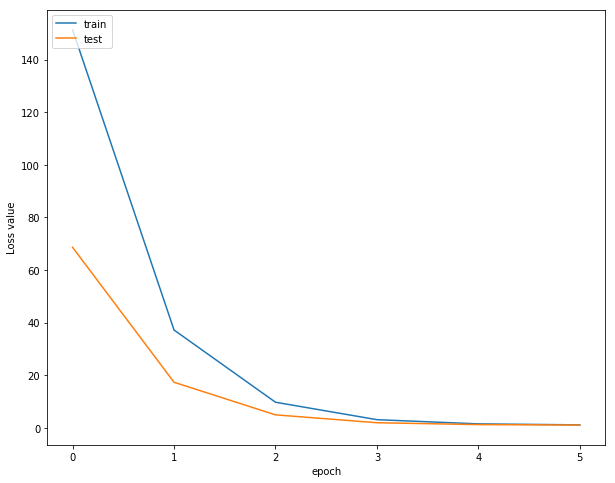

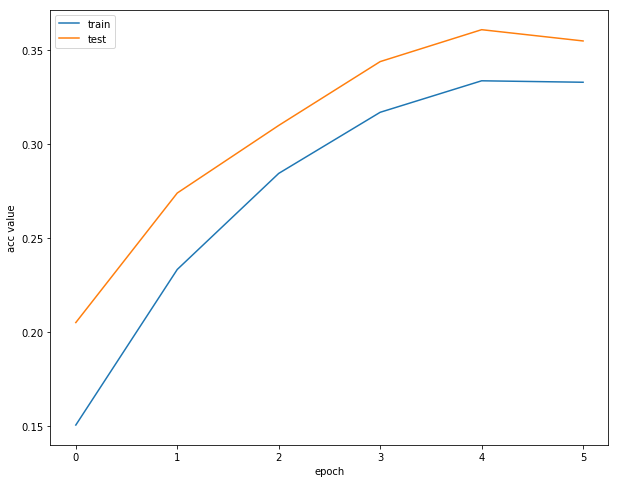

In [9]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [10]:
# evalute SVM model
loss, acc = svm_model.evaluate(x_test, y_test)
print('evaluate loss:%f acc:%f' % (loss, acc))

   32/10000 [..............................] - ETA: 0s

 2208/10000 [=====>........................] - ETA: 0s

 4736/10000 [=============>................] - ETA: 0s

 7200/10000 [====================>.........] - ETA: 0s

 9632/10000 [===========================>..] - ETA: 0s

10000/10000 [==============================] - 0s 21us/step


evaluate loss:1.079012 acc:0.334800
